### Estrutura dos dados

In [ ]:
import pandas as pd
df = pd.read_csv('housing.csv')

In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


### Limpando os dados

In [ ]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [ ]:
media = df['total_bedrooms'].mean()
df['total_bedrooms'].fillna(media, inplace=True)

In [ ]:
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

### Visualizando os dados

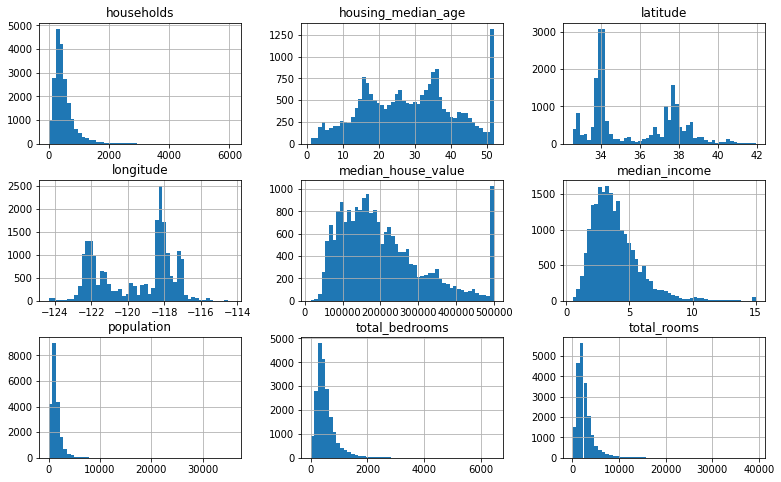

In [ ]:
import matplotlib.pyplot as plt

df.hist(bins=50, figsize=(13, 8))
plt.show()

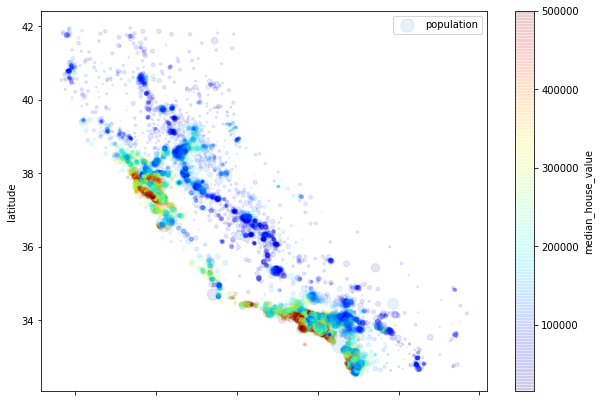

In [ ]:
df.plot(kind="scatter", x = 'longitude', y="latitude", 
            alpha=0.1, 
            s=df["population"]/100, 
            label="population", 
            figsize=(10, 7), 
            c="median_house_value", 
            cmap=plt.get_cmap("jet"), 
            colorbar=True)

### Buscando Correlações

In [ ]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069260,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066658,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.318998,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.927253,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069260,-0.066658,-0.318998,0.927253,1.000000,0.873910,0.974725,-0.007682,0.049454
population,0.099773,-0.108785,-0.296244,0.857126,0.873910,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.974725,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007682,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049454,-0.024650,0.065843,0.688075,1.000000


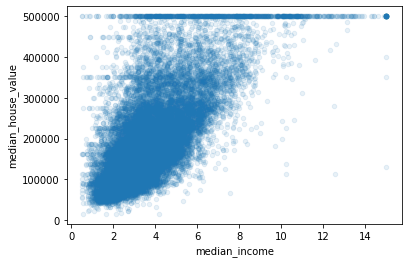

In [ ]:
df.plot(kind='scatter', x="median_income", y="median_house_value", alpha=0.1)

### Combinações de Atributo

In [ ]:
df['rooms_per_household'] = df['total_rooms'] / df['households']
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
df['population_per_household'] = df['population'] / df['households']

In [ ]:
corr = df.corr()
corr['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049454
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.220049
Name: median_house_value, dtype: float64

### Tratamento de dados categóricos

In [ ]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [ ]:
pd.get_dummies(df['ocean_proximity'])

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [ ]:
df = pd.concat([df, pd.get_dummies(df['ocean_proximity'])], axis=1)
df.drop(['ocean_proximity'], axis=1, inplace=True)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,6.984127,0.146591,2.555556,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,6.238137,0.155797,2.109842,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,8.288136,0.129516,2.802260,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,5.817352,0.184458,2.547945,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,6.281853,0.172096,2.181467,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,5.045455,0.224625,2.560606,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,6.114035,0.215208,3.122807,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,5.205543,0.215173,2.325635,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,5.329513,0.219892,2.123209,0,1,0,0,0


### Escalonamento das features

In [ ]:
X = df.drop(['median_house_value'], axis=1)
y = df['median_house_value']

In [ ]:
X.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'rooms_per_household', 'bedrooms_per_room', 'population_per_household',
       '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

### Conjuntos de treinamento e testes

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train - " + str(X_train.shape))
print("y_train - " + str(y_train.shape))
print("X_test - " + str(X_test.shape))
print("y_test - " + str(y_test.shape))

X_train - (16512, 16)
y_train - (16512,)
X_test - (4128, 16)
y_test - (4128,)


### Selecione e treine um modelo

In [ ]:
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import cross_val_score

treeReg = DecisionTreeRegressor()

forestReg = RandomForestRegressor(max_depth=2, random_state=0)

print(cross_val_score(treeReg.fit(X_train, y_train) , X_train, y_train, cv=10))
print('\n')
print(cross_val_score(forestReg.fit(X_train, y_train), X_train, y_train, cv=10))


[0.69747187 0.63501875 0.6645501  0.60533055 0.60513273 0.66551476
 0.64856612 0.64117035 0.69172813 0.64332465]


[0.5362357  0.49025405 0.5142774  0.50514119 0.47938583 0.53633328
 0.52767598 0.48224878 0.52385748 0.51698471]


### Ajustando o modelo

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[25, 30]}
forestGrid = GridSearchCV(forestReg, parameters)
cross_val_score(forestGrid.fit(X_train, y_train).best_estimator_, X_train, y_train, cv=10)


array([0.83740105, 0.80901997, 0.81624426, 0.78678583, 0.79520967,
       0.83677941, 0.82587278, 0.80456282, 0.82295029, 0.81726526])

### Árvores de Decisão vs Floresta Aleatória

In [ ]:
y_pred_forestGrid = forestGrid.best_estimator_.predict(X_test)

Text(0.5, 1.0, 'Predict vs Target - Random Forest')

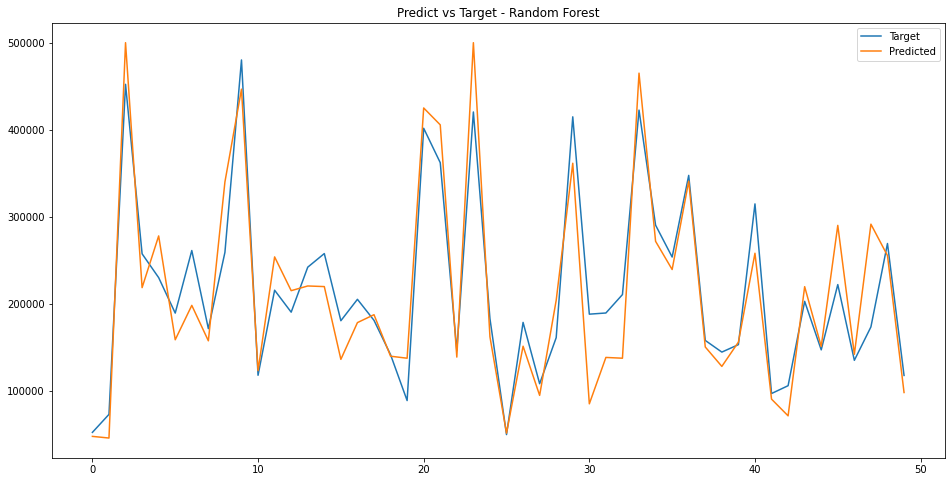

In [ ]:
comp_forestGrid = pd.DataFrame({'Predicted':y_pred_forestGrid,'Target':y_test})
fig= plt.figure(figsize=(16,8))
comp_forestGrid = comp_forestGrid.reset_index()
comp_forestGrid = comp_forestGrid.drop(['index'],axis=1)
plt.plot(comp_forestGrid[:50])
plt.legend(['Target','Predicted'])
plt.title("Predict vs Target - Random Forest")

In [ ]:
y_pred_treeReg = treeReg.predict(X_test)

Text(0.5, 1.0, 'Predict vs Target - Decision Tree')

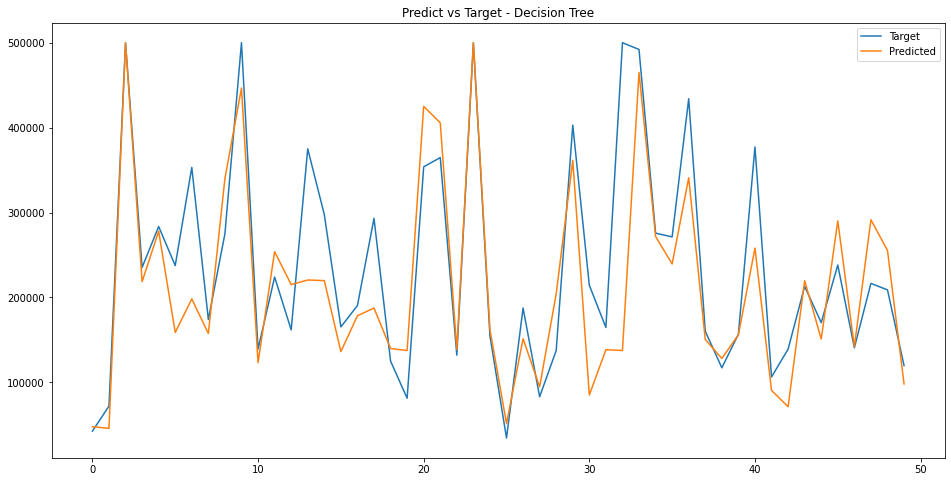

In [ ]:
comp_treeReg = pd.DataFrame({'Predicted':y_pred_treeReg,'Target':y_test})
fig= plt.figure(figsize=(16,8))
comp_treeReg = comp_treeReg.reset_index()
comp_treeReg = comp_treeReg.drop(['index'],axis=1)
plt.plot(comp_treeReg[:50])
plt.legend(['Target','Predicted'])
plt.title("Predict vs Target - Decision Tree")

In [ ]:
from sklearn.metrics import mean_squared_error

rmse_forestGrid = mean_squared_error(y_test, y_pred_forestGrid, squared=False)
rmse_treeReg = mean_squared_error(y_test, y_pred_treeReg, squared=False)

print("RMSE - Random Forest " + str(rmse_forestGrid))
print("RMSE - Decision Tree " + str(rmse_treeReg))

RMSE - Random Forest 50178.644786099605
RMSE - Decision Tree 72447.58241991955
